In [1]:

from pathlib import Path
import pandas as pd

ROOT = Path.cwd()
DATA = ROOT / "data"
if not (DATA / "features_btc.parquet").exists():
    DATA = ROOT.parent / "data"

btc = pd.read_parquet(DATA / "features_btc.parquet")
eth = pd.read_parquet(DATA / "features_eth.parquet")

display(btc.tail())
display(eth.tail())


,ts,series,slug,endDate,volume,volume24hr,liquidity,outcomes,outcomePrices,bestBid,...,clobTokenIds,prob_up,mid,spread,bar_time,open,high,low,close,volume_spot
284,2025-12-08 20:59:19.217370987+00:00,BTC,bitcoin-up-or-down-on-december-6,2025-12-06T17:00:00Z,433332.354197,NaN,NaN,"[Up, Down]","[1, 0]",0.999,...,[670112008060039634589081575812981125794812690...,1.000,0.9995,0.001,2025-12-08 20:55:00+00:00,90857.0,90876.08,90712.01,90813.85,35.602796
285,2025-12-08 20:59:19.217371941+00:00,BTC,bitcoin-up-or-down-on-december-7,2025-12-07T17:00:00Z,515479.999370,152631.199179,NaN,"[Up, Down]","[1, 0]",0.999,...,[338765211957537285043355154856232519701008219...,1.000,0.9995,0.001,2025-12-08 20:55:00+00:00,90857.0,90876.08,90712.01,90813.85,35.602796
286,2025-12-08 20:59:19.217371941+00:00,BTC,bitcoin-up-or-down-on-december-8,2025-12-08T17:00:00Z,667509.866874,422710.920696,NaN,"[Up, Down]","[1, 0]",0.999,...,[316113386088425803289143518710321122384950688...,1.000,0.9995,0.001,2025-12-08 20:55:00+00:00,90857.0,90876.08,90712.01,90813.85,35.602796
287,2025-12-08 20:59:19.217371941+00:00,BTC,bitcoin-up-or-down-on-december-9,2025-12-09T17:00:00Z,20960.191647,NaN,16353.8211,"[Up, Down]","[0.665, 0.335]",0.660,...,[767743344965592956775257278175115939913188209...,0.665,0.6650,0.010,2025-12-08 20:55:00+00:00,90857.0,90876.08,90712.01,90813.85,35.602796
288,2025-12-08 20:59:19.217372894+00:00,BTC,bitcoin-up-or-down-on-december-10,2025-12-10T17:00:00Z,2460.988983,NaN,11527.2166,"[Up, Down]","[0.505, 0.495]",0.490,...,[670509710659858249717748682480451898510679255...,0.505,0.5050,0.030,2025-12-08 20:55:00+00:00,90857.0,90876.08,90712.01,90813.85,35.602796


,ts,series,slug,endDate,volume,volume24hr,liquidity,outcomes,outcomePrices,bestBid,...,clobTokenIds,prob_up,mid,spread,bar_time,open,high,low,close,volume_spot
265,2025-12-08 20:59:19.217458963+00:00,ETH,ethereum-up-or-down-on-december-6,2025-12-06T17:00:00Z,298233.123242,NaN,NaN,"[Up, Down]","[1, 0]",0.999,...,[157043195278742976625407522018334171717636581...,1.000,0.9995,0.001,2025-12-08 20:55:00+00:00,3141.12,3141.93,3130.38,3137.09,1335.899821
266,2025-12-08 20:59:19.217459917+00:00,ETH,ethereum-up-or-down-on-december-7,2025-12-07T17:00:00Z,190000.970740,27710.198177,NaN,"[Up, Down]","[0, 1]",NaN,...,[458419476066935897255213096349720621163572545...,0.000,NaN,NaN,2025-12-08 20:55:00+00:00,3141.12,3141.93,3130.38,3137.09,1335.899821
267,2025-12-08 20:59:19.217459917+00:00,ETH,ethereum-up-or-down-on-december-8,2025-12-08T17:00:00Z,203790.624842,161484.698553,0.0000,"[Up, Down]","[1, 0]",0.999,...,[279269848534154985782612827204783895134968742...,1.000,0.9995,0.001,2025-12-08 20:55:00+00:00,3141.12,3141.93,3130.38,3137.09,1335.899821
268,2025-12-08 20:59:19.217459917+00:00,ETH,ethereum-up-or-down-on-december-9,2025-12-09T17:00:00Z,4114.275199,NaN,13545.5189,"[Up, Down]","[0.615, 0.385]",0.600,...,[228921049950890579354808223066507124243630165...,0.615,0.6150,0.030,2025-12-08 20:55:00+00:00,3141.12,3141.93,3130.38,3137.09,1335.899821
269,2025-12-08 20:59:19.217461109+00:00,ETH,ethereum-up-or-down-on-december-10,2025-12-10T17:00:00Z,NaN,NaN,10749.5500,"[Up, Down]","[0.5, 0.5]",0.490,...,[811265068636926154266583490997263740615678139...,0.500,0.5000,0.020,2025-12-08 20:55:00+00:00,3141.12,3141.93,3130.38,3137.09,1335.899821


In [2]:

btc_clean = btc.dropna(subset=["prob_up", "close"]).copy()
eth_clean = eth.dropna(subset=["prob_up", "close"]).copy()
print("btc rows:", len(btc_clean), "eth rows:", len(eth_clean))


btc rows: 270 eth rows: 263


In [3]:

import json, requests

PRED_DIR = DATA / "bias_predictions"
THRESH = 0.7
BASE = "https://gamma-api.polymarket.com"

def slug_from_date(symbol, dt):
    sym = symbol.lower()
    name = "bitcoin" if sym in {"btc", "bitcoin"} else ("ethereum" if sym in {"eth", "ethereum"} else sym)
    month = dt.strftime("%B").lower()
    return f"{name}-up-or-down-on-{month}-{dt.day}"

def latest_pred(file):
    df = pd.read_csv(file).dropna(subset=["prob_bull"])
    return df.iloc[-1]

for series, fname in {"BTC": "btc_us_gated.csv", "ETH": "eth_us_gated.csv"}.items():
    row = latest_pred(PRED_DIR / fname)
    dt = pd.to_datetime(row["date"])
    slug = slug_from_date(series, dt)
    prob = row["prob_bull"]
    resp = requests.get(f"{BASE}/events/slug/{slug}", timeout=10).json()
    if not isinstance(resp, dict) or not resp.get("markets"):
        print(f"{series} {slug}: no markets found (resp keys: {list(resp) if isinstance(resp, dict) else type(resp)})")
        continue
    mkt = resp["markets"][0]
    prices = json.loads(mkt["outcomePrices"]) if isinstance(mkt["outcomePrices"], str) else mkt["outcomePrices"]
    best_bid, best_ask = mkt.get("bestBid"), mkt.get("bestAsk")
    print(f"{series} {slug}")
    print(f" model prob_up={prob:.3f} current_price_up={float(prices[0]):.3f} bestBid={best_bid} bestAsk={best_ask}")
    if prob >= THRESH:
        print(" signal: BUY Up (<= bestAsk if priced below prob)")
    elif prob <= 1 - THRESH:
        print(" signal: BUY Down (<= bestAsk on Down leg)")
    else:
        print(" signal: none (in the middle band)")
    print()


BTC bitcoin-up-or-down-on-december-4
 model prob_up=0.145 current_price_up=1.000 bestBid=0.999 bestAsk=1
 signal: BUY Down (<= bestAsk on Down leg)

ETH ethereum-up-or-down-on-december-5
 model prob_up=0.081 current_price_up=0.000 bestBid=None bestAsk=0.001
 signal: BUY Down (<= bestAsk on Down leg)



In [4]:

import pathlib

THRESH = 0.7
rows = []
for f in sorted(PRED_DIR.glob("*.csv")):
    df = pd.read_csv(f)
    if {"label", "prob_bull"} - set(df.columns):
        continue
    df = df.dropna(subset=["label", "prob_bull"])
    pred = (df["prob_bull"] >= THRESH).astype(int)
    acc = (pred == df["label"]).mean() if not df.empty else float("nan")
    rows.append({"file": f.name, "n": len(df), "acc": acc})
pd.DataFrame(rows)


,file,n,acc
0,btc_tokyo_gated.csv,960,0.875000
1,btc_tokyo_gated_fee.csv,960,0.875000
2,btc_us_gated.csv,2503,0.829405
3,btc_us_gated_fee.csv,2503,0.829405
4,eth_tokyo_gated.csv,860,0.866279
5,eth_tokyo_gated_fee.csv,860,0.866279
6,eth_us_gated.csv,994,0.885312
7,eth_us_gated_fee.csv,994,0.885312


In [5]:

from pathlib import Path
if 'DATA' not in globals():
    ROOT = Path.cwd()
    DATA = ROOT / 'data'
    if not (DATA / 'features_btc.parquet').exists():
        DATA = ROOT.parent / 'data'

import numpy as np
import pandas as pd

THRESH_UP, THRESH_DOWN = 0.7, 0.3

# Helper to turn outcomePrices into a label (1 = Up wins, 0 = Down wins)
def label_from_op(op):
    if isinstance(op, (list, tuple, np.ndarray)):
        return None if len(op) == 0 else (1 if float(op[0]) >= 0.5 else 0)
    try:
        vals = json.loads(op)
        if not vals:
            return None
        return 1 if float(vals[0]) >= 0.5 else 0
    except Exception:
        return None

label_by_date = {}
slug_by_date = {}
end_by_date = {}
for key, path in {"btc": DATA / "features_btc.parquet", "eth": DATA / "features_eth.parquet"}.items():
    df = pd.read_parquet(path)
    # One row per slug, then dedupe by event_date so we only score each Polymarket day once
    last = df.sort_values("ts").groupby("slug").tail(1).copy()
    last["label"] = last["outcomePrices"].apply(label_from_op)
    last["event_date"] = pd.to_datetime(last["endDate"]).dt.date
    last = last.drop_duplicates(subset=["event_date"], keep="last")
    label_by_date[key] = last.set_index("event_date")["label"].to_dict()
    slug_by_date[key] = last.set_index("event_date")["slug"].to_dict()
    end_by_date[key] = last.set_index("event_date")["endDate"].to_dict()

rows = []
skipped = {}
for path in PRED_DIR.glob("*.csv"):
    name = path.name
    prefix = "btc" if name.startswith("btc") else ("eth" if name.startswith("eth") else None)
    if prefix is None:
        continue
    df = pd.read_csv(path).dropna(subset=["prob_bull"])
    miss = 0
    for _, r in df.iterrows():
        event_date = pd.to_datetime(r["date"]).date()
        lbl = label_by_date[prefix].get(event_date)
        if lbl is None:
            miss += 1
            continue
        prob = r["prob_bull"]
        if prob >= THRESH_UP:
            pred = 1
        elif prob <= THRESH_DOWN:
            pred = 0
        else:
            continue  # middle band, no bet
        rows.append({
            "file": name,
            "date": event_date,
            "slug": slug_by_date[prefix][event_date],
            "event_end": end_by_date[prefix][event_date],
            "prob_bull": prob,
            "pred": pred,
            "label": lbl,
            "correct": int(pred == lbl),
        })
    skipped[name] = miss

results = pd.DataFrame(rows)

if results.empty:
    print("No matched bets.")
else:
    summary = (results.groupby("file")
        .agg(bets=("correct", "count"),
             acc=("correct", "mean"),
             wins=("correct", "sum"))
        .reset_index())
    summary["losses"] = summary["bets"] - summary["wins"]
    summary["missed_labels"] = summary["file"].map(skipped)
    display(summary)
    print("Sample matched rows (first 5):")
    display(results.head())


,file,bets,acc,wins,losses,missed_labels
0,btc_tokyo_gated.csv,44,0.613636,27,17,916
1,btc_tokyo_gated_fee.csv,44,0.613636,27,17,916
2,btc_us_gated.csv,187,0.759358,142,45,2316
3,btc_us_gated_fee.csv,187,0.759358,142,45,2316
4,eth_tokyo_gated.csv,65,0.753846,49,16,795
5,eth_tokyo_gated_fee.csv,65,0.753846,49,16,795
6,eth_us_gated.csv,135,0.777778,105,30,859
7,eth_us_gated_fee.csv,135,0.777778,105,30,859


Sample matched rows (first 5):


,file,date,slug,event_end,prob_bull,pred,label,correct
0,eth_tokyo_gated.csv,2025-03-23,ethereum-up-or-down-on-march-23,2025-03-23T12:00:00Z,0.810811,1,1.0,1
1,eth_tokyo_gated.csv,2025-04-11,ethereum-up-or-down-on-april-11,2025-04-11T12:00:00Z,0.789474,1,1.0,1
2,eth_tokyo_gated.csv,2025-04-19,ethereum-up-or-down-on-april-19,2025-04-19T12:00:00Z,0.750000,1,1.0,1
3,eth_tokyo_gated.csv,2025-04-21,ethereum-up-or-down-on-april-21,2025-04-21T12:00:00Z,1.000000,1,1.0,1
4,eth_tokyo_gated.csv,2025-04-23,ethereum-up-or-down-on-april-23,2025-04-23T12:00:00Z,0.981740,1,1.0,1


btc_us_gated.csv: bets=187, acc=0.759, r2=0.200, brier=0.197


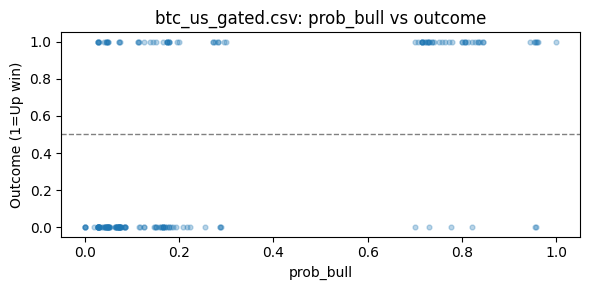

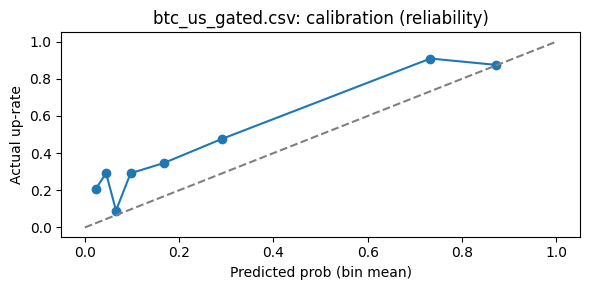

eth_us_gated.csv: bets=135, acc=0.778, r2=nan, brier=0.195


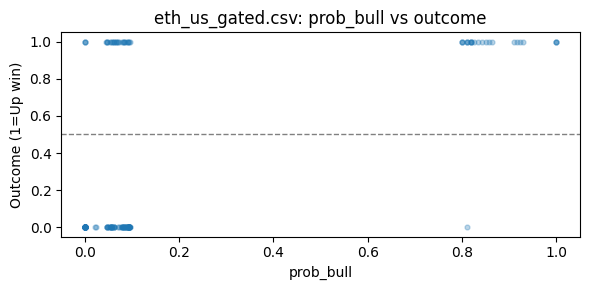

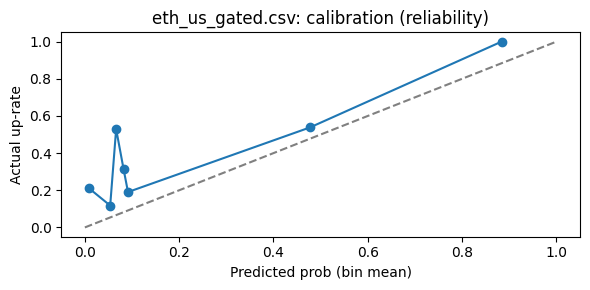

In [6]:

# Reliability / calibration plots for prob_bull vs actual outcome
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

# Reuse matched results if present; otherwise rebuild using the same matching logic
if 'results' not in globals():
    def label_from_op(op):
        if isinstance(op, (list, tuple, np.ndarray)):
            return None if len(op) == 0 else (1 if float(op[0]) >= 0.5 else 0)
        try:
            vals = json.loads(op)
            if not vals:
                return None
            return 1 if float(vals[0]) >= 0.5 else 0
        except Exception:
            return None
    label_by_date = {}
    slug_by_date = {}
    end_by_date = {}
    for key, path in {'btc': DATA/'features_btc.parquet', 'eth': DATA/'features_eth.parquet'}.items():
        df = pd.read_parquet(path)
        last = df.sort_values('ts').groupby('slug').tail(1).copy()
        last['label'] = last['outcomePrices'].apply(label_from_op)
        last['event_date'] = pd.to_datetime(last['endDate']).dt.date
        last = last.drop_duplicates(subset=['event_date'], keep='last')
        label_by_date[key] = last.set_index('event_date')['label'].to_dict()
        slug_by_date[key] = last.set_index('event_date')['slug'].to_dict()
        end_by_date[key] = last.set_index('event_date')['endDate'].to_dict()
    rows = []
    for path in PRED_DIR.glob('*.csv'):
        name = path.name
        prefix = 'btc' if name.startswith('btc') else ('eth' if name.startswith('eth') else None)
        if prefix is None:
            continue
        df = pd.read_csv(path).dropna(subset=['prob_bull'])
        for _, r in df.iterrows():
            event_date = pd.to_datetime(r['date']).date()
            lbl = label_by_date[prefix].get(event_date)
            if lbl is None:
                continue
            prob = r['prob_bull']
            if prob >= THRESH_UP:
                pred = 1
            elif prob <= THRESH_DOWN:
                pred = 0
            else:
                continue
            rows.append({
                'file': name,
                'date': event_date,
                'slug': slug_by_date[prefix][event_date],
                'event_end': end_by_date[prefix][event_date],
                'prob_bull': prob,
                'pred': pred,
                'label': lbl,
                'correct': int(pred == lbl),
            })
    results = pd.DataFrame(rows)

if results.empty:
    print('No matched rows to plot')
else:
    def r2_manual(y_true, y_pred):
        y_true = np.asarray(y_true, float)
        y_pred = np.asarray(y_pred, float)
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - y_true.mean()) ** 2)
        return np.nan if ss_tot == 0 else 1 - ss_res / ss_tot

    def reliability(df, nbins=10):
        cuts = pd.qcut(df['prob_bull'], q=min(nbins, len(df)), duplicates='drop')
        return (df.groupby(cuts, observed=False)
                  .agg(prob_mean=('prob_bull', 'mean'),
                       actual_mean=('label', 'mean'),
                       count=('label', 'size'))
                  .reset_index())

    for name in ['btc_us_gated.csv', 'eth_us_gated.csv']:
        df = results[results['file'] == name]
        if df.empty:
            print(f'{name}: no matched rows')
            continue
        r2_val = r2_manual(df['label'], df['prob_bull'])
        brier = np.mean((df['prob_bull'] - df['label']) ** 2)
        acc = (df['pred'] == df['label']).mean()
        print(f"{name}: bets={len(df)}, acc={acc:.3f}, r2={r2_val:.3f}, brier={brier:.3f}")

        # Scatter: prob vs outcome (0/1)
        plt.figure(figsize=(6, 3))
        plt.scatter(df['prob_bull'], df['label'], alpha=0.3, s=12)
        plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
        plt.xlabel('prob_bull')
        plt.ylabel('Outcome (1=Up win)')
        plt.title(f'{name}: prob_bull vs outcome')
        plt.tight_layout()
        plt.show()

        # Reliability plot
        rel = reliability(df, nbins=8)
        plt.figure(figsize=(6, 3))
        plt.plot(rel['prob_mean'], rel['actual_mean'], marker='o')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('Predicted prob (bin mean)')
        plt.ylabel('Actual up-rate')
        plt.title(f'{name}: calibration (reliability)')
        plt.tight_layout()
        plt.show()


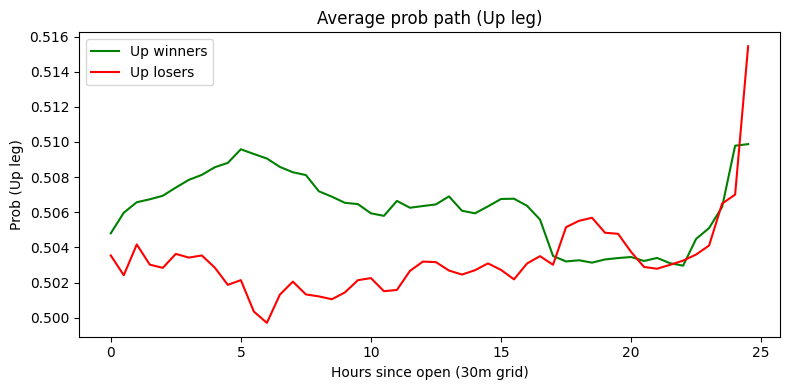

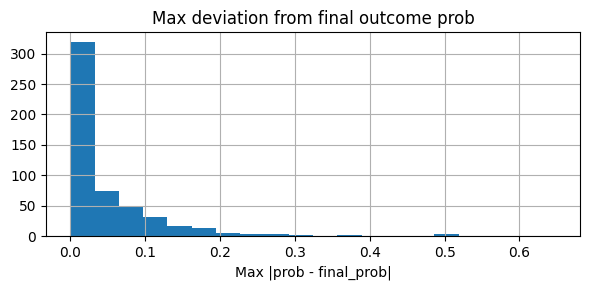

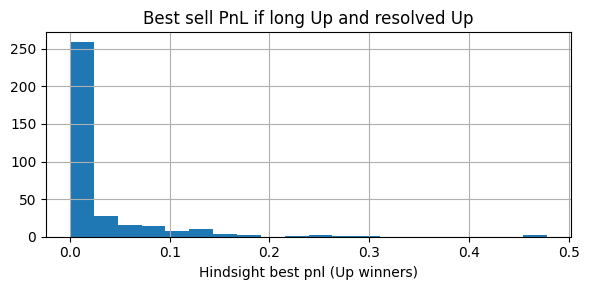

Hindsight best sell stats (Up winners): {'n': 344, 'mean': np.float64(0.028343750000000008), 'median': np.float64(0.0050000000000000044)}


In [7]:

# Intraday price-path stats (30m resampled) for Up leg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import subprocess, sys
from pathlib import Path
import json as jsonlib

# Resolve paths
base_data = DATA if 'DATA' in globals() else Path('data')
if not (base_data / 'features_btc.parquet').exists():
    base_data = base_data.parent / 'data'
price_json_dir = base_data / 'prices_history'
price_resampled_dir = base_data / 'prices_history_30m'
scripts_dir = Path.cwd().parent / 'scripts'
if not scripts_dir.exists():
    scripts_dir = Path.cwd() / 'scripts'

# Auto-fetch and resample if missing

def ensure_price_data():
    if price_resampled_dir.exists() and any(price_resampled_dir.glob('*.csv')):
        return True
    fetch_script = scripts_dir / 'fetch_prices_history.py'
    resample_script = scripts_dir / 'resample_prices_history.py'
    if not fetch_script.exists() or not resample_script.exists():
        return False
    try:
        price_json_dir.mkdir(parents=True, exist_ok=True)
        price_resampled_dir.mkdir(parents=True, exist_ok=True)
        subprocess.run([
            sys.executable,
            str(fetch_script),
            '--data-dir', str(base_data),
            '--out-dir', str(price_json_dir),
            '--interval', '1m',
            '--fidelity', '10',
        ], check=True)
        subprocess.run([
            sys.executable,
            str(resample_script),
            '--src', str(price_json_dir),
            '--out', str(price_resampled_dir),
            '--rule', '30min',
            '--method', 'linear',
        ], check=True)
    except Exception as e:
        print('fetch/resample failed:', e)
        return False
    return price_resampled_dir.exists() and any(price_resampled_dir.glob('*.csv'))

if not ensure_price_data():
    print('prices_history_30m not found and auto-fetch failed; run fetch_prices_history.py then resample_prices_history.py')
else:
    # Load labels using spot move (open->close)
    def build_labeled(df, bars_path):
        bars = pd.read_csv(bars_path, parse_dates=['timestamp']).sort_values('timestamp')
        df = df.copy()
        df['event_dt'] = pd.to_datetime(df['endDate'], utc=True)
        df['open_ts'] = pd.to_datetime(df['bar_time'], utc=True)
        df = df.dropna(subset=['open_ts'])
        df = pd.merge_asof(
            df.sort_values('open_ts'),
            bars[['timestamp', 'close']].rename(columns={'close': 's_open'}),
            left_on='open_ts', right_on='timestamp',
            direction='nearest', tolerance=pd.Timedelta('5min')
        )
        df = df.dropna(subset=['s_open'])
        df = pd.merge_asof(
            df.sort_values('event_dt'),
            bars[['timestamp', 'close']].rename(columns={'close': 's_close'}),
            left_on='event_dt', right_on='timestamp',
            direction='backward', tolerance=pd.Timedelta('1d')
        )
        df = df.dropna(subset=['s_close'])
        df['y'] = (df['s_close'] >= df['s_open']).astype(int)
        return df[['slug', 'y']]

    btc_labels = build_labeled(btc, base_data/'cb_btc_5m.csv').set_index('slug')['y'].to_dict()
    eth_labels = build_labeled(eth, base_data/'cb_eth_5m.csv').set_index('slug')['y'].to_dict()
    label_map = {**btc_labels, **eth_labels}

    def up_token_map(df):
        mapping = {}
        for _, r in df[['slug', 'clobTokenIds']].dropna().iterrows():
            ids = r['clobTokenIds']
            try:
                ids = jsonlib.loads(ids) if isinstance(ids, str) else list(ids)
            except Exception:
                continue
            if not ids:
                continue
            mapping[r['slug']] = str(ids[0])
        return mapping

    up_map = {}
    up_map.update(up_token_map(btc))
    up_map.update(up_token_map(eth))

    records = []
    for path in sorted(price_resampled_dir.glob('*.csv')):
        stem = path.stem
        if '_' not in stem:
            continue
        slug, token_id = stem.rsplit('_', 1)
        if slug not in up_map or token_id != up_map[slug]:
            continue
        lbl = label_map.get(slug)
        if lbl is None:
            continue
        df = pd.read_csv(path, parse_dates=['ts'])
        if df.empty:
            continue
        df = df.sort_values('elapsed_hours')
        records.append({'slug': slug, 'token_id': token_id, 'label': int(lbl), 'df': df})

    if not records:
        print('No matching price paths with labels and Up token')
    else:
        grid_hours = np.arange(0, 25, 0.5)  # 30m grid up to 24h

        def interp_path(rec):
            x = rec['df']['elapsed_hours'].to_numpy()
            y = rec['df']['prob'].to_numpy()
            order = np.argsort(x)
            x = x[order]; y = y[order]
            y = np.clip(y, 0.0, 1.0)
            uniq_x, uniq_idx = np.unique(x, return_index=True)
            x = uniq_x; y = y[uniq_idx]
            return np.interp(grid_hours, x, y, left=y[0], right=y[-1])

        win_paths = []
        lose_paths = []
        max_dev = []
        early_cross_reversals = 0
        early_window = 6.0  # hours
        entry_prices = []
        best_exit = []

        for rec in records:
            arr = interp_path(rec)
            final_prob = arr[-1]
            dev = float(np.max(np.abs(arr - final_prob)))
            max_dev.append({'slug': rec['slug'], 'label': rec['label'], 'max_dev': dev})
            if rec['label'] == 1:
                win_paths.append(arr)
                entry_prices.append(arr[0])
                best_exit.append(arr.max())
            else:
                lose_paths.append(arr)
                mask_early = grid_hours <= early_window
                if arr[mask_early].max() >= 0.7 and arr[-1] < 0.5:
                    early_cross_reversals += 1

        def avg_path(paths):
            if not paths:
                return None
            return np.mean(np.vstack(paths), axis=0)

        avg_win = avg_path(win_paths)
        avg_lose = avg_path(lose_paths)

        plt.figure(figsize=(8, 4))
        if avg_win is not None:
            plt.plot(grid_hours, avg_win, label='Up winners', color='green')
        if avg_lose is not None:
            plt.plot(grid_hours, avg_lose, label='Up losers', color='red')
        plt.xlabel('Hours since open (30m grid)')
        plt.ylabel('Prob (Up leg)')
        plt.title('Average prob path (Up leg)')
        plt.legend()
        plt.tight_layout()
        plt.show()

        md_df = pd.DataFrame(max_dev)
        if not md_df.empty:
            plt.figure(figsize=(6, 3))
            md_df['max_dev'].hist(bins=20)
            plt.xlabel('Max |prob - final_prob|')
            plt.title('Max deviation from final outcome prob')
            plt.tight_layout()
            plt.show()

        if entry_prices and best_exit:
            pnl = np.array(best_exit) - np.array(entry_prices)
            plt.figure(figsize=(6, 3))
            pd.Series(pnl).hist(bins=20)
            plt.xlabel('Hindsight best pnl (Up winners)')
            plt.title('Best sell PnL if long Up and resolved Up')
            plt.tight_layout()
            plt.show()
            print('Hindsight best sell stats (Up winners):', {'n': len(pnl), 'mean': pnl.mean(), 'median': np.median(pnl)})




In [8]:

# Model vs market path: side-based PnL using calibrated _us_gated bias predictions (label = outcomePrices Up>=0.5)
import numpy as np
import pandas as pd
import json as jsonlib
from pathlib import Path

base_data = DATA if 'DATA' in globals() else Path('data')
if not (base_data / 'features_btc.parquet').exists():
    base_data = base_data.parent / 'data'
price_resampled_dir = base_data / 'prices_history_30m'

# Label from outcomePrices (Up>=0.5 -> 1 else 0)
def label_from_op(op):
    if isinstance(op, (list, tuple, np.ndarray)):
        return None if len(op)==0 else (1 if float(op[0])>=0.5 else 0)
    try:
        vals=jsonlib.loads(op)
        if not vals:
            return None
        return 1 if float(vals[0])>=0.5 else 0
    except Exception:
        return None

if not price_resampled_dir.exists():
    print('prices_history_30m missing; run fetch/resample first')
else:
    def build_labels_outcome(df):
        df=df.copy()
        df['label']=df['outcomePrices'].apply(label_from_op)
        df['event_date']=pd.to_datetime(df['endDate']).dt.date
        return df[['slug','label','event_date']]

    btc_lab = build_labels_outcome(btc)
    eth_lab = build_labels_outcome(eth)
    label_map = {**btc_lab.set_index('slug').to_dict(orient='index'), **eth_lab.set_index('slug').to_dict(orient='index')}

    def token_map(df):
        mapping={}
        for _, r in df[['slug','clobTokenIds']].dropna().iterrows():
            ids=r['clobTokenIds']
            try: ids=jsonlib.loads(ids) if isinstance(ids,str) else list(ids)
            except Exception: continue
            if ids: mapping[r['slug']]=[str(x) for x in ids]
        return mapping
    token_ids = {**token_map(btc), **token_map(eth)}

    pred_dir = base_data/'bias_predictions'
    iso_path = pred_dir/'iso_calibration_us.csv'
    if iso_path.exists():
        iso_tab = pd.read_csv(iso_path)
        p_model_map = iso_tab.set_index('slug')['p_iso'].to_dict()
        calib_used = 'iso'
    else:
        btc_map = pd.read_csv(pred_dir/'btc_us_gated.csv', parse_dates=['date']).dropna(subset=['prob_bull'])
        eth_map = pd.read_csv(pred_dir/'eth_us_gated.csv', parse_dates=['date']).dropna(subset=['prob_bull'])
        p_model_map = {**btc_map.set_index(btc_map['date'].dt.date)['prob_bull'].to_dict(), **eth_map.set_index(eth_map['date'].dt.date)['prob_bull'].to_dict()}
        calib_used = 'raw'

    price_by_token = {}
    for path_price in price_resampled_dir.glob('*.csv'):
        stem = path_price.stem
        if '_' not in stem: continue
        _, token_id_p = stem.rsplit('_',1)
        df_p = pd.read_csv(path_price, parse_dates=['ts'])
        if df_p.empty: continue
        df_p = df_p.sort_values('elapsed_hours')
        price_by_token[token_id_p] = df_p

    rows = []
    for slug, ids in token_ids.items():
        if len(ids) < 2:
            continue
        up_id, down_id = ids[0], ids[1]
        up_df = price_by_token.get(up_id)
        down_df = price_by_token.get(down_id)
        if up_df is None or down_df is None:
            continue
        info = label_map.get(slug)
        if info is None or info['label'] is None:
            continue
        y = info['label']; event_date = info['event_date']
        p_model = p_model_map.get(slug) if calib_used=='iso' else p_model_map.get(event_date)
        if p_model is None:
            continue

        side = 'up' if p_model >= 0.5 else 'down'
        prob_up_entry = float(up_df['prob'].iloc[0])
        entry = prob_up_entry if side == 'up' else (1.0 - prob_up_entry)
        payout = 1.0 if ((side == 'up' and y == 1) or (side == 'down' and y == 0)) else 0.0
        pnl = payout - entry

        idx = (up_df['prob'] - p_model).abs().idxmin()
        t_equal = float(up_df.loc[idx, 'elapsed_hours']) if idx in up_df.index else None
        prob_equal = float(up_df.loc[idx, 'prob']) if idx in up_df.index else None

        rows.append({
            'slug': slug,
            'event_date': event_date,
            'side': side,
            'p_model': p_model,
            'prob_up_entry': prob_up_entry,
            'entry': entry,
            'label': y,
            'payout': payout,
            'pnl': pnl,
            't_equal_hours': t_equal,
            'prob_at_equal': prob_equal,
        })

    res_df = pd.DataFrame(rows)
    if res_df.empty:
        print('No rows with model probs + paths + labels')
    else:
        res_df['win'] = ((res_df['side']=='up') & (res_df['label']==1)) | ((res_df['side']=='down') & (res_df['label']==0))
        by_side = res_df.groupby('side').agg(count=('pnl','size'), win_rate=('win','mean'), pnl_mean=('pnl','mean'), pnl_median=('pnl','median'), entry_mean=('entry','mean'))
        overall = res_df['pnl'].agg(['count','mean','median', 'sum'])
        print(f'Decision rule: side = Up if p_model>=0.5 else Down (using bias_predictions *_us_gated, calib={calib_used}). Label = outcomePrices (Up>=0.5).')
        print('PNL by side (enter at first price of chosen leg, settle at resolution):')
        display(by_side)
        print('Overall PNL:')
        display(overall.to_frame().T)
        print('Sample rows:')
        display(res_df.head())


Decision rule: side = Up if p_model>=0.5 else Down (using bias_predictions *_us_gated, calib=iso). Label = outcomePrices (Up>=0.5).
PNL by side (enter at first price of chosen leg, settle at resolution):


,count,win_rate,pnl_mean,pnl_median,entry_mean
side,,,,,
down,241,0.742739,0.245069,0.500000,0.497669
up,82,0.878049,0.374253,0.496667,0.503796


Overall PNL:


,count,mean,median,sum
pnl,323.0,0.277865,0.5,89.750417


Sample rows:


,slug,event_date,side,p_model,prob_up_entry,entry,label,payout,pnl,t_equal_hours,prob_at_equal,win
0,bitcoin-up-or-down-on-march-15-noon,2025-03-15,down,0.253247,0.560000,0.440000,0.0,1.0,0.560000,15.5,0.270000,True
1,bitcoin-up-or-down-on-march-16,2025-03-16,down,0.473684,0.511667,0.488333,0.0,1.0,0.511667,28.0,0.470000,True
2,bitcoin-up-or-down-on-march-18,2025-03-18,down,0.253247,0.510000,0.490000,0.0,1.0,0.510000,15.5,0.268333,True
3,bitcoin-up-or-down-on-march-20,2025-03-20,up,0.904762,0.510000,0.510000,1.0,1.0,0.490000,42.5,0.908333,True
4,bitcoin-up-or-down-on-march-21,2025-03-21,down,0.333333,0.501667,0.498333,0.0,1.0,0.501667,39.5,0.338333,True


## RL exit timing on Polymarket 30m paths
12-dim state uses the requested scaling (mid drift, pnl, momentum, vol, drawdown, time, conviction, bias, side, distance to 0.5). DQN learns when to exit vs hold; optional isotonic calibration on p_model_open.


In [9]:
# Imports and device setup
import os
import math
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

DEVICE = 'mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")
print("Base imports loaded.")


Using device: mps
Base imports loaded.


In [10]:
from pathlib import Path
p = Path('data') if Path('data').exists() else Path('../data')
price_dir = p / 'prices_history_30m'
print("cwd:", Path.cwd())
print("price_dir:", price_dir.resolve(), "exists:", price_dir.exists())
print("csv count:", len(list(price_dir.glob('*.csv'))))

cwd: /Users/compiling/Desktop/445Project/polymarket_btc
price_dir: /Users/compiling/Desktop/445Project/data/prices_history_30m exists: True
csv count: 1066


In [11]:
  %time from sklearn.isotonic import IsotonicRegression

CPU times: user 383 ms, sys: 67.3 ms, total: 451 ms
Wall time: 451 ms


In [12]:
!{sys.executable} -m pip install -U gymnasium scikit-learn torch



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [13]:
# RL library imports (gym + PyTorch)
import time

t0 = time.time()
import gymnasium as gym
from gymnasium import spaces
print(f'gymnasium imported in {time.time()-t0:.2f}s', flush=True)

t1 = time.time()
import torch
import torch.nn as nn
print(f'torch imported in {time.time()-t1:.2f}s (cum {time.time()-t0:.2f}s)', flush=True)

t2 = time.time()
from sklearn.isotonic import IsotonicRegression
print(f'scikit-learn imported in {time.time()-t2:.2f}s (cum {time.time()-t0:.2f}s)', flush=True)
print(f'RL libraries imported in {time.time()-t0:.2f}s total', flush=True)

DEVICE = torch.device('mps' if torch.cuda.is_available() else 'mps')
print('Using device:', DEVICE)


gymnasium imported in 0.01s
torch imported in 0.00s (cum 0.01s)
scikit-learn imported in 0.00s (cum 0.01s)
RL libraries imported in 0.01s total
Using device: mps


In [14]:
# Build episodes from bias predictions + price paths (for RL)
import json as jsonlib
from pathlib import Path

base_data = DATA if 'DATA' in globals() else Path('data')
if not (base_data / 'features_btc.parquet').exists():
    base_data = base_data.parent / 'data'
price_resampled_dir = base_data / 'prices_history_30m'
pred_dir = base_data / 'bias_predictions'

def label_from_op(op):
    if isinstance(op, (list, tuple, np.ndarray)):
        return None if len(op) == 0 else (1 if float(op[0]) >= 0.5 else 0)
    try:
        vals = jsonlib.loads(op) if isinstance(op, str) else op
        if not vals:
            return None
        return 1 if float(vals[0]) >= 0.5 else 0
    except Exception:
        return None

def build_labels_outcome(df):
    df = df.copy()
    df['label'] = df['outcomePrices'].apply(label_from_op)
    df['event_date'] = pd.to_datetime(df['endDate']).dt.date
    return df[['slug', 'label', 'event_date']]

def token_map(df):
    mapping = {}
    for _, r in df[['slug', 'clobTokenIds']].dropna().iterrows():
        ids = r['clobTokenIds']
        try:
            ids = jsonlib.loads(ids) if isinstance(ids, str) else list(ids)
        except Exception:
            continue
        if ids:
            mapping[r['slug']] = [str(x) for x in ids]
    return mapping

if not price_resampled_dir.exists():
    raise RuntimeError('prices_history_30m missing; run fetch/resample first')

btc_lab = build_labels_outcome(btc)
eth_lab = build_labels_outcome(eth)
label_map = {**btc_lab.set_index('slug').to_dict(orient='index'),
             **eth_lab.set_index('slug').to_dict(orient='index')}
token_ids = {**token_map(btc), **token_map(eth)}

iso_path = pred_dir / 'iso_calibration_us.csv'
if iso_path.exists():
    iso_tab = pd.read_csv(iso_path)
    p_model_map = iso_tab.set_index('slug')['p_iso'].to_dict()
else:
    btc_map = pd.read_csv(pred_dir / 'btc_us_gated.csv', parse_dates=['date']).dropna(subset=['prob_bull'])
    eth_map = pd.read_csv(pred_dir / 'eth_us_gated.csv', parse_dates=['date']).dropna(subset=['prob_bull'])
    p_model_map = {**btc_map.set_index(btc_map['date'].dt.date)['prob_bull'].to_dict(),
                   **eth_map.set_index(eth_map['date'].dt.date)['prob_bull'].to_dict()}

price_by_token = {}
for path_price in price_resampled_dir.glob('*.csv'):
    stem = path_price.stem
    if '_' not in stem:
        continue
    _, token_id_p = stem.rsplit('_', 1)
    df_p = pd.read_csv(path_price, parse_dates=['ts'])
    if df_p.empty:
        continue
    df_p = df_p.sort_values('elapsed_hours')
    price_by_token[token_id_p] = df_p

episodes = []
for slug, ids in token_ids.items():
    if len(ids) < 2:
        continue
    up_id, down_id = ids[0], ids[1]
    up_df = price_by_token.get(up_id)
    down_df = price_by_token.get(down_id)
    if up_df is None or down_df is None:
        continue

    info = label_map.get(slug)
    if info is None or info['label'] is None:
        continue
    y = info['label']
    event_date = info['event_date']

    p_model = p_model_map.get(slug) if slug in p_model_map else p_model_map.get(event_date)
    if p_model is None:
        continue

    side = 1 if p_model >= 0.5 else -1
    mid = up_df['prob'].to_numpy(dtype=np.float64)
    bid = np.clip(mid - 0.01, 0, 1)
    ask = np.clip(mid + 0.01, 0, 1)

    entry_price = float(ask[0] if side == 1 else 1 - bid[0])
    resolution = 1.0 if ((side == 1 and y == 1) or (side == -1 and y == 0)) else 0.0

    df_out = pd.DataFrame({
        'elapsed_hours': up_df['elapsed_hours'],
        'mid_prob': mid,
        'bid_prob': bid,
        'ask_prob': ask,
        'polymarket_resolution': resolution,
    })

    meta = {
        'id': slug,
        'p_model_open': float(p_model),
        'p_model_raw': float(p_model),
        'p0_market': float(mid[0]),
        'side': side,
        'entry': entry_price,
        'resolution': resolution,
    }
    episodes.append({'id': slug, 'df': df_out, 'meta': meta})

if not episodes:
    raise RuntimeError('No episodes built from bias predictions and price paths')

# -----------------------------
# FILTER + CAP (do this BEFORE split)
# -----------------------------
H = 48
min_hold = globals().get('min_hold', 3)

episodes = [ep for ep in episodes if len(ep['df']) >= (min_hold + 1)]
episodes = [ep for ep in episodes if len(ep['df']) >= H]  # keep only full 48-step windows

for ep in episodes:
    ep['df'] = ep['df'].iloc[:H].reset_index(drop=True)

# deterministic split (AFTER filtering/cap)
train_frac = TRAIN_FRAC if 'TRAIN_FRAC' in globals() else 0.8
split = max(1, int(len(episodes) * train_frac))
train_eps = episodes[:split]
val_eps = episodes[split:]

print(f"Episodes built (post-filter/cap): train={len(train_eps)}, val={len(val_eps)}")
lens = [len(ep['df']) for ep in episodes]
print('POST df_len avg/min/max:', float(np.mean(lens)), int(np.min(lens)), int(np.max(lens)))
print('POST train df_len avg/min/max:',
      float(np.mean([len(ep["df"]) for ep in train_eps])),
      int(np.min([len(ep["df"]) for ep in train_eps])),
      int(np.max([len(ep["df"]) for ep in train_eps])))
print('POST val df_len avg/min/max:',
      float(np.mean([len(ep["df"]) for ep in val_eps])),
      int(np.min([len(ep["df"]) for ep in val_eps])),
      int(np.max([len(ep["df"]) for ep in val_eps])))


Episodes built (post-filter/cap): train=254, val=64
POST df_len avg/min/max: 48.0 48 48
POST train df_len avg/min/max: 48.0 48 48
POST val df_len avg/min/max: 48.0 48 48


In [15]:
# Build holdout episodes (endDate > CUT)
import pandas as pd, numpy as np, json as jsonlib
from pathlib import Path
CUT = '2024-12-09'

def label_from_op(op):
    if isinstance(op, (list, tuple, np.ndarray)):
        return None if len(op)==0 else (1 if float(op[0])>=0.5 else 0)
    try:
        vals=jsonlib.loads(op) if isinstance(op,str) else op
        if not vals:
            return None
        return 1 if float(vals[0])>=0.5 else 0
    except Exception:
        return None

def build_labels_outcome(df):
    df=df.copy()
    df['label']=df['outcomePrices'].apply(label_from_op)
    df['endDate_dt']=pd.to_datetime(df['endDate'], utc=True)
    df['event_date']=pd.to_datetime(df['endDate'], utc=True).dt.date
    return df[['slug','label','endDate_dt','event_date']]

def token_map(df):
    mapping={}
    for _, r in df[['slug','clobTokenIds']].dropna().iterrows():
        ids=r['clobTokenIds']
        try:
            ids=jsonlib.loads(ids) if isinstance(ids,str) else list(ids)
        except Exception:
            continue
        if ids:
            mapping[r['slug']]=[str(x) for x in ids]
    return mapping

base_data = DATA if 'DATA' in globals() else Path('data')
if not (base_data / 'features_btc.parquet').exists():
    base_data = base_data.parent / 'data'
price_resampled_dir = base_data / 'prices_history_30m'
pred_dir = base_data / 'bias_predictions'

btc=pd.read_parquet(base_data/'features_btc.parquet')
eth=pd.read_parquet(base_data/'features_eth.parquet')
cutoff_dt = pd.to_datetime(CUT, utc=True)
btc_hold = btc[pd.to_datetime(btc['endDate'], utc=True) > cutoff_dt]
eth_hold = eth[pd.to_datetime(eth['endDate'], utc=True) > cutoff_dt]
if btc_hold.empty and eth_hold.empty:
    print('No holdout markets found after cutoff')
else:
    btc_lab=build_labels_outcome(btc_hold)
    eth_lab=build_labels_outcome(eth_hold)
    label_map={**btc_lab.set_index('slug').to_dict(orient='index'), **eth_lab.set_index('slug').to_dict(orient='index')}
    token_ids={**token_map(btc_hold), **token_map(eth_hold)}

    iso_path = pred_dir/'iso_calibration_us.csv'
    if iso_path.exists():
        iso_tab = pd.read_csv(iso_path)
        p_model_map = iso_tab.set_index('slug')['p_iso'].to_dict()
    else:
        btc_map = pd.read_csv(pred_dir/'btc_us_gated.csv', parse_dates=['date']).dropna(subset=['prob_bull'])
        eth_map = pd.read_csv(pred_dir/'eth_us_gated.csv', parse_dates=['date']).dropna(subset=['prob_bull'])
        p_model_map = {**btc_map.set_index(btc_map['date'].dt.date)['prob_bull'].to_dict(), **eth_map.set_index(eth_map['date'].dt.date)['prob_bull'].to_dict()}

    price_by_token={}
    for path_price in price_resampled_dir.glob('*.csv'):
        stem=path_price.stem
        if '_' not in stem:
            continue
        _, token_id_p = stem.rsplit('_',1)
        df_p = pd.read_csv(path_price, parse_dates=['ts'])
        if df_p.empty:
            continue
        df_p=df_p.sort_values('elapsed_hours')
        price_by_token[token_id_p]=df_p

    holdout_eps=[]
    for slug, ids in token_ids.items():
        if len(ids)<2:
            continue
        up_id, down_id = ids[0], ids[1]
        up_df=price_by_token.get(up_id)
        down_df=price_by_token.get(down_id)
        if up_df is None or down_df is None:
            continue
        info=label_map.get(slug)
        if info is None or info.get('label') is None:
            continue
        y=info['label']; event_date=info['event_date']
        p_model = p_model_map.get(slug) if slug in p_model_map else p_model_map.get(event_date)
        if p_model is None:
            continue
        side = 1 if p_model >=0.5 else -1
        mid = up_df['prob'].to_numpy(dtype=np.float64)[:48]
        if len(mid) < 4:
            continue
        bid = np.clip(mid-0.01,0,1)
        ask = np.clip(mid+0.01,0,1)
        entry_price = float(ask[0] if side==1 else 1-bid[0])
        resolution = 1.0 if ((side==1 and y==1) or (side==-1 and y==0)) else 0.0
        df_out = pd.DataFrame({
            'elapsed_hours': up_df['elapsed_hours'][:len(mid)],
            'mid_prob': mid,
            'bid_prob': bid,
            'ask_prob': ask,
        })
        meta = {
            'id': slug,
            'p_model_open': float(p_model),
            'p_model_raw': float(p_model),
            'p0_market': float(mid[0]),
            'side': side,
            'entry': entry_price,
            'resolution': resolution,
        }
        holdout_eps.append({'id': slug, 'df': df_out, 'meta': meta})
    holdout_eps = [ep for ep in holdout_eps if len(ep['df']) >= 4]
    print('Holdout episodes:', len(holdout_eps), 'cutoff', cutoff_dt.date())
    if holdout_eps:
        lens=[len(ep['df']) for ep in holdout_eps]
        print('holdout df_len avg/min/max:', float(np.mean(lens)), int(np.min(lens)), int(np.max(lens)))




Holdout episodes: 322 cutoff 2024-12-09
holdout df_len avg/min/max: 47.92857142857143 41 48


In [16]:
# Ensure required prep (episodes + env + torch) exists
required = ['train_eps', 'val_eps', 'torch', 'DEVICE']
missing = [name for name in required if name not in globals()]
if missing:
    raise RuntimeError(f"Missing {missing}. Run the data prep/env and RL import cells above first.")

import random
from collections import deque
import numpy as np

# Defaults for agent fees and reproducibility
if 'FEE' not in globals():
    FEE = 0.005
if 'RANDOM_SEED' not in globals():
    RANDOM_SEED = 42


if 'ExitEnv' not in globals():
    class ExitEnv(gym.Env):
        metadata = {'render.modes': ['human']}

        def __init__(self, episodes, fee=0.005, seed=42, min_hold=1, exit_penalty=0.0):
            super().__init__()
            self.episodes = episodes
            self.fee = fee
            self.action_space = spaces.Discrete(2)
            self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(12,), dtype=np.float32)
            self.rng = np.random.default_rng(seed)
            self.current = None
            self.t = 0
            self._done = False
            self.min_hold = min_hold
            self.exit_penalty = exit_penalty

        def _price_for_side(self, mid):
            return mid if self.current['side'] == 1 else 1 - mid

        def _obs(self):
            mid_hist = self.current['mid'][: self.t + 1]
            mid = mid_hist[-1]
            entry = self.current['entry']
            side = self.current['side']
            p0_market = self.current['p0_market']
            p_model = self.current['p_model']
            price_side_hist = mid_hist if side == 1 else 1 - mid_hist
            price_now = price_side_hist[-1]
            recent = mid_hist[-10:]
            diffs = np.diff(recent)
            momentum = diffs.mean() if len(diffs) else 0.0
            vol = recent.std() if len(recent) > 1 else 0.0
            peak = price_side_hist.max()
            drawdown = (peak - price_now) * side
            total = len(self.current['mid']) - 1
            t_norm = self.t / total if total > 0 else 0.0
            feats = np.array([
                (mid - 0.5) * 2,
                (mid - entry) * side * 5,
                (mid - p0_market) * side * 5,
                momentum * 30,
                vol * 40,
                drawdown * 8,
                1 - t_norm,
                (p_model - 0.5) * 2,
                (p0_market - 0.5) * 2,
                side,
                (mid - 0.5) ** 2 * 4,
                t_norm,
            ], dtype=np.float32)
            return feats

        def reset(self, *, seed=None, options=None):
            super().reset(seed=seed)
            self._done = False
            ep = options.get('episode') if options and options.get('episode') is not None else self.rng.choice(self.episodes)
            df = ep['df']
            self.current = {
                'mid': df['mid_prob'].to_numpy(dtype=np.float64),
                'bid': df['bid_prob'].to_numpy(dtype=np.float64),
                'ask': df['ask_prob'].to_numpy(dtype=np.float64),
                'side': ep['meta']['side'],
                'entry': ep['meta']['entry'],
                'p0_market': ep['meta']['p0_market'],
                'p_model': ep['meta']['p_model_open'],
                'resolution': ep['meta']['resolution'],
                'id': ep['id'],
            }
            self.t = 0
            self.T = len(self.current['mid'])
            return self._obs(), {}

        def step(self, action):
            if self._done:
                raise RuntimeError('step() called after done; call reset() first')
            mid = self.current['mid'][self.t]
            side = self.current['side']
            terminated = False
            truncated = False
            info = {'episode_id': self.current['id'], 't': int(self.t), 'action': int(action)}
            reward = 0.0
            can_sell = self.t >= self.min_hold
            if action == 1 and can_sell:
                exit_price = self._price_for_side(mid)
                reward = (exit_price - self.current['entry']) * side - self.fee * exit_price
                reward = max(min(reward, 1.0), -1.0)
                terminated = True
            else:
                # hold: small penalty, advance time
                reward = -0.002
                if self.t >= self.T - 1:
                    payout = self.current['resolution'] if side == 1 else 1 - self.current['resolution']
                    reward += (payout - self.current['entry']) * side
                    reward = max(min(reward, 1.0), -1.0)
                    truncated = True
                else:
                    self.t += 1
            done = terminated or truncated
            if done:
                self._done = True
                obs = self._obs()
                return obs, reward, terminated, truncated, info
            obs = self._obs()
            return obs, reward, False, False, info

        def render(self, mode='human'):
            print(self.current)














In [17]:
# Quick sanity: force sell at t=10 on first episode
if 'train_eps' in globals():
    env = ExitEnv(train_eps[:1], fee=globals().get('FEE', 0.005), seed=0)
    obs, _ = env.reset()
    for t in range(50):
        a = 1 if t == 10 else 0
        obs, r, term, trunc, info = env.step(a)
        if abs(r) > 1e-12:
            print("NONZERO reward at t=", t, "r=", r, "terminated=", term, "truncated=", trunc)
        if term or trunc:
            break




NONZERO reward at t= 0 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 1 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 2 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 3 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 4 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 5 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 6 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 7 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 8 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 9 r= -0.002 terminated= False truncated= False
NONZERO reward at t= 10 r= 0.010908333333333308 terminated= True truncated= False


In [ ]:

class ReplayBuffer:
    def __init__(self, size=200_000):
        self.buffer = deque(maxlen=size)
    def add(self, s, a, r, ns, done):
        self.buffer.append((s, a, r, ns, done))
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        s, a, r, ns, d = zip(*batch)
        return (
            torch.as_tensor(np.stack(s), dtype=torch.float32, device=DEVICE),
            torch.as_tensor(a, dtype=torch.int64, device=DEVICE),
            torch.as_tensor(r, dtype=torch.float32, device=DEVICE),
            torch.as_tensor(np.stack(ns), dtype=torch.float32, device=DEVICE),
            torch.as_tensor(d, dtype=torch.float32, device=DEVICE),
        )
    def __len__(self):
        return len(self.buffer)

def normalize_obs(x):
    means = np.array([0, 0, 0, 0, 0.05, 0, 0.5, 0, 0, 0, 0, 0.5], dtype=np.float32)
    stds = np.array([1, 1, 1, 1, 1, 1, 0.3, 1, 1, 1, 1, 0.3], dtype=np.float32)
    stds = np.where(stds == 0, 1.0, stds)
    return (x - means) / stds

class DuelingQNetwork(nn.Module):
    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.feature = nn.Sequential(
            nn.Linear(obs_dim, 256), nn.ReLU(), nn.Linear(256, 256), nn.ReLU()
        )
        self.value_head = nn.Sequential(nn.Linear(256, 128), nn.ReLU(), nn.Linear(128, 1))
        self.adv_head = nn.Sequential(nn.Linear(256, 128), nn.ReLU(), nn.Linear(128, act_dim))
    def forward(self, x):
        feat = self.feature(x)
        value = self.value_head(feat)
        adv = self.adv_head(feat)
        return value + adv - adv.mean(dim=1, keepdim=True)

class TorchDQNAgent:
    def __init__(self, q_net):
        self.q_net = q_net
    def predict(self, obs, deterministic=True):
        obs_t = torch.as_tensor(normalize_obs(obs), dtype=torch.float32, device=DEVICE).unsqueeze(0)
        with torch.no_grad():
            q_vals = self.q_net(obs_t)
            action = int(torch.argmax(q_vals, dim=1).item())
        return action, None

def train_dqn(
    env,
    total_steps=200_000,
    lr=5e-5,
    gamma=0.98,
    buffer_size=200_000,
    batch_size=128,
    eps_start=1.0,
    eps_end=0.02,
    eps_frac=0.6,
    target_sync=1500,
    warmup=1_000,
    grad_clip=0.5,
):
    obs_dim = env.observation_space.shape[0]
    act_dim = env.action_space.n
    q_net = DuelingQNetwork(obs_dim, act_dim).to(DEVICE)
    target_net = DuelingQNetwork(obs_dim, act_dim).to(DEVICE)
    target_net.load_state_dict(q_net.state_dict())
    optim = torch.optim.Adam(q_net.parameters(), lr=lr)
    rb = ReplayBuffer(buffer_size)

    obs, _ = env.reset()
    obs = normalize_obs(obs)
    losses = []
    ep_returns = []
    current_return = 0.0
    rew_min, rew_max = 1e9, -1e9
    ep_min, ep_max = 1e9, -1e9
    ep_len = 0
    ep_nonzero = 0
    ep_lens, ep_nz = [], []
    zero_rewards = 0
    total_rewards = 0
    nonzero_min, nonzero_max = 1e9, -1e9
    eps_decay = (eps_start - eps_end) / max(1, eps_frac * total_steps)

    for step in range(1, total_steps + 1):
        eps = max(eps_end, eps_start - step * eps_decay)
        if random.random() < eps:
            action = 1 if random.random() < 0.7 else 0  # bias explore to HOLD
        else:
            with torch.no_grad():
                q_vals = q_net(torch.as_tensor(obs, dtype=torch.float32, device=DEVICE).unsqueeze(0))
                action = int(torch.argmax(q_vals, dim=1).item())

        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        rew_min = min(rew_min, reward)
        rew_max = max(rew_max, reward)
        current_return += reward
        ep_len += 1
        total_rewards += 1
        if abs(reward) < 1e-12:
            zero_rewards += 1
        else:
            ep_nonzero += 1
            nonzero_min = min(nonzero_min, reward)
            nonzero_max = max(nonzero_max, reward)

        rb.add(obs, action, reward, normalize_obs(next_obs), done)
        obs = normalize_obs(next_obs)

        if done:
            ep_returns.append(current_return)
            ep_min = min(ep_min, current_return)
            ep_max = max(ep_max, current_return)
            ep_lens.append(ep_len)
            ep_nz.append(ep_nonzero)
            ep_len = 0
            ep_nonzero = 0
            current_return = 0.0
            obs, _ = env.reset()
            obs = normalize_obs(obs)

        if step > warmup and len(rb) >= batch_size:
            batch_obs, batch_act, batch_rew, batch_next, batch_done = rb.sample(batch_size)
            batch_obs = torch.as_tensor(batch_obs, dtype=torch.float32, device=DEVICE)
            batch_next = torch.as_tensor(batch_next, dtype=torch.float32, device=DEVICE)
            with torch.no_grad():
                next_q_online = q_net(batch_next)
                next_actions = next_q_online.argmax(dim=1)
                target_q = target_net(batch_next).gather(1, next_actions.unsqueeze(1)).squeeze(1)
                target_q = target_q.clamp(-10, 10)
                target_val = batch_rew + gamma * (1.0 - batch_done) * target_q
            current_q = q_net(batch_obs).gather(1, batch_act.unsqueeze(1)).squeeze(1)
            current_q = current_q.clamp(-10, 10)
            target_val = target_val.clamp(-10, 10)
            loss = nn.functional.smooth_l1_loss(current_q, target_val)
            optim.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(q_net.parameters(), grad_clip)
            optim.step()
            losses.append(float(loss.item()))

        if step % target_sync == 0:
            target_net.load_state_dict(q_net.state_dict())
        if step % 2_000 == 0:
            avg_loss = np.mean(losses[-200:]) if losses else None
            recent_ret = np.mean(ep_returns[-50:]) if ep_returns else None
            if ep_lens:
                lastL = ep_lens[-50:]; lastNZ = ep_nz[-50:]
                print(f"ep_len last50 avg/min/max: {float(np.mean(lastL)):.2f}/{int(np.min(lastL))}/{int(np.max(lastL))}")
                print(f"nonzero rewards/ep last50 avg/min/max: {float(np.mean(lastNZ)):.2f}/{int(np.min(lastNZ))}/{int(np.max(lastNZ))}")
            zr_frac = zero_rewards / max(1, total_rewards)
            print(f"step={step} eps={eps:.3f} avg_loss={avg_loss} avg_ret50={recent_ret} reward_range=[{rew_min:.6f},{rew_max:.6f}] ep_return_range=[{ep_min:.6f},{ep_max:.6f}] zero_reward_frac={zr_frac:.3f}", flush=True)
            if nonzero_max > -1e8:
                print(f"nonzero_reward_range=[{nonzero_min:.6f},{nonzero_max:.6f}]")

    final_eps = max(eps_end, eps_start - total_steps * eps_decay)
    print(f"Training finished. final_eps={final_eps:.3f} episodes={len(ep_returns)} reward_range=[{rew_min:.6f},{rew_max:.6f}] ep_return_range=[{ep_min:.6f},{ep_max:.6f}] zero_reward_frac={zero_rewards/max(1,total_rewards):.3f} nonzero_reward_range=[{nonzero_min:.6f},{nonzero_max:.6f}]", flush=True)
    return TorchDQNAgent(q_net)

train_env = ExitEnv(train_eps, fee=FEE, seed=RANDOM_SEED)
print("Training environment built.", flush=True)
agent = train_dqn(train_env)
print("Training complete.", flush=True)







Training environment built.
ep_len last50 avg/min/max: 2.40/2/5
nonzero rewards/ep last50 avg/min/max: 2.40/2/5
step=2000 eps=0.984 avg_loss=8.574113415306784e-05 avg_ret50=-0.00031129166666666046 reward_range=[-0.129337,0.238700] ep_return_range=[-0.131337,0.226700] zero_reward_frac=0.000
nonzero_reward_range=[-0.129337,0.238700]
ep_len last50 avg/min/max: 2.36/2/5
nonzero rewards/ep last50 avg/min/max: 2.36/2/5
step=4000 eps=0.967 avg_loss=4.488738594119468e-06 avg_ret50=0.006630999999999995 reward_range=[-0.129337,0.238700] ep_return_range=[-0.131337,0.226700] zero_reward_frac=0.000
nonzero_reward_range=[-0.129337,0.238700]
ep_len last50 avg/min/max: 2.48/2/6
nonzero rewards/ep last50 avg/min/max: 2.48/2/6
step=6000 eps=0.951 avg_loss=5.065773184824707e-06 avg_ret50=-0.0008956666666666606 reward_range=[-0.129337,0.238700] ep_return_range=[-0.131337,0.226700] zero_reward_frac=0.000
nonzero_reward_range=[-0.129337,0.238700]
ep_len last50 avg/min/max: 2.68/2/5
nonzero rewards/ep last50

In [119]:
# Evaluation utilities
def evaluate_hold_to_end(episodes, fee=0.0):
    pnls = []
    for ep in episodes:
        side = ep['meta']['side']
        entry = ep['meta']['entry']
        payout = ep['meta']['resolution'] if side == 1 else 1 - ep['meta']['resolution']
        pnl = (payout - entry) * side - fee * payout
        pnls.append(pnl)
    return np.array(pnls)


def rollout_agent(agent, episodes, fee=FEE):
    env = ExitEnv(episodes, fee=fee, seed=RANDOM_SEED + 2)
    pnls, actions = [], []
    for ep in episodes:
        obs, _ = env.reset(options={'episode': ep})
        done = False
        step_actions = []
        reward = 0.0
        while not done:
            action, _ = agent.predict(obs, deterministic=True)
            step_actions.append(int(action))
            obs, reward, terminated, truncated, info = env.step(int(action))
            done = terminated or truncated
        pnls.append(reward)
        actions.append({'episode_id': ep['id'], 'actions': step_actions})
    return np.array(pnls), actions


def summarize_pnl(pnls):
    pnl_series = pd.Series(pnls)
    total = pnl_series.sum()
    avg = pnl_series.mean()
    win_rate = (pnl_series > 0).mean()
    cum = pnl_series.cumsum()
    drawdown = (cum.cummax() - cum).max()
    sharpe_like = pnl_series.mean() / (pnl_series.std() + 1e-8)
    return {
        'total': total,
        'avg': avg,
        'win_rate': win_rate,
        'max_drawdown': drawdown,
        'sharpe_like': sharpe_like,
        'n': len(pnl_series),
    }



In [ ]:
# Baseline vs agent (plus bias baseline)
hold_pnls = evaluate_hold_to_end(val_eps if val_eps else train_eps)
agent_pnls, agent_actions = rollout_agent(agent, val_eps if val_eps else train_eps)
print("Hold-to-end:", summarize_pnl(hold_pnls))
print("DQN agent:", summarize_pnl(agent_pnls))

summary = pd.DataFrame([summarize_pnl(hold_pnls), summarize_pnl(agent_pnls)], index=['hold_to_end','dqn_agent'])
print(summary)

sell_steps = [next((i for i,a in enumerate(act['actions']) if a==1), None) for act in agent_actions]
sell_steps = [s for s in sell_steps if s is not None]
if sell_steps:
    print(f"Sell rate: {len(sell_steps)/len(agent_actions):.2f}, avg sell step: {np.mean(sell_steps):.2f}, median: {np.median(sell_steps):.2f}")
else:
    print("Sell rate: 0 (agent never sells)")

# Plot a handful of episodes with actions
N_PLOT = min(10, len(val_eps if val_eps else train_eps))
examples = (val_eps if val_eps else train_eps)[:N_PLOT]
for ep, act in zip(examples, agent_actions[:N_PLOT]):
    df = ep['df']
    actions = act['actions']
    t_sell = next((i for i, a in enumerate(actions) if a == 1), None)
    if t_sell is not None and t_sell >= len(df):
        t_sell = None
    plt.figure(figsize=(8, 3))
    plt.plot(df['elapsed_hours'], df['mid_prob'], label='mid_prob')
    if t_sell is not None:
        plt.axvline(df['elapsed_hours'].iloc[t_sell], color='red', linestyle='--', label='sell')
    plt.title(f"Episode {ep['id']} (side={'Up' if ep['meta']['side']==1 else 'Down'})")
    plt.xlabel('elapsed_hours')
    plt.ylabel('prob')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Evaluate on holdout if present
if 'holdout_eps' in globals() and holdout_eps:
    print(f"Holdout episodes: {len(holdout_eps)}")
    hold_pnls_h = evaluate_hold_to_end(holdout_eps)
    agent_pnls_h, agent_actions_h = rollout_agent(agent, holdout_eps)
    print("Holdout Hold-to-end:", summarize_pnl(hold_pnls_h))
    print("Holdout DQN agent:", summarize_pnl(agent_pnls_h))

